# Bike-Share Data Science Task 

## Background

A bicycle-sharing system is a service in which users can rent/use bicycles available for shared use on a short term basis for a price or free. Currently, there are over 500 bike-sharing programs around the world. Such systems usually aim to reduce congestion, noise, and air pollution by providing free/affordable access to bicycles for short-distance trips in an urban area as opposed to motorized vehicles. The number of users on any given day can vary greatly for such systems. The ability to predict the number of hourly users can allow the entities (businesses/governments) that oversee these systems to manage them in a more efficient and cost-effective manner. The goal here was to perform Exploratory Data Analysis (EDA) and build a prediction model for the hourly utilization count of this data. 

## Data set used

The data set used is from University of California Irvine’s Machine Learning Repository. The data-set compilers used information partially from a two-year historical log corresponding to the years 2011 and 2012 from Capital Bikeshare system, Washington D.C. This information is available publicly. The compilers aggregated the data on an hourly basis and daily basis. Next they extracted and added all corresponding weather and seasonal information from here.

Our data-set is a csv file with information from 17,379 hours over 731 days with 16 features (information categories) for each hour. The features are:

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered


From an initial look, the data-points far exceed the number of features, which makes this a “skinny” data-set, considered ideal for ML.

# Setup

In [103]:
import import_ipynb
from data_ingestion import DataIngestion
# Common imports
import numpy as np
import pandas as pd

#visualisation
import seaborn as sns 
import matplotlib.pyplot as plt

# sklearn model selection
from sklearn import model_selection
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_validate
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

# sklearn models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# plotting pretty figures
from prettytable import PrettyTable
from pprint import pprint
from yellowbrick.regressor import ResidualsPlot
%matplotlib inline 
sns.set(color_codes=True)

importing Jupyter notebook from data_ingestion.ipynb


# Data Ingestion

In [105]:
dataingestion = DataIngestion("rawdata/hour.csv")
df = dataingestion.getdata()

# Exploratory Data Analysis

This is a multi-step process which was performed on the data set to discover patterns, spot anomalies, and check assumptions with the help of summary statistics and graphical representations. 

In [4]:
continuous_variables = ['temp', 'atemp', 'hum', 'windspeed']
categorical_variables = ['season', 'holiday', 'mnth', 'hr', 'weekday', 'workingday', 'weathersit']

features= continuous_variables + categorical_variables
target = ['cnt']
user_type = ['casual', 'registered']

# To display the top 5 rows
df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Data Statistics

Statistics for the continuous variables in the data set

In [100]:
df[continuous_variables].describe()

,temp,atemp,hum,windspeed
count,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.496987,0.475775,0.627229,0.190098
std,0.192556,0.171850,0.192930,0.122340
min,0.020000,0.000000,0.000000,0.000000
25%,0.340000,0.333300,0.480000,0.104500
50%,0.500000,0.484800,0.630000,0.194000
75%,0.660000,0.621200,0.780000,0.253700
max,1.000000,1.000000,1.000000,0.850700


Statistics for the categorical variables in the data set

In [44]:
df[categorical_variables].astype('category').describe()

,season,holiday,mnth,hr,weekday,workingday,weathersit
count,17379,17379,17379,17379,17379,17379,17379
unique,4,2,12,24,7,2,4
top,3,0,7,17,6,1,1
freq,4496,16879,1488,730,2512,11865,11413


### Important attributes contributing towards maximum count of bike-share

In [57]:
most_count_df = df.sort_values(by ='cnt', ascending=False).head()
most_count_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
14773,14774,2012-09-12,3,1,9,18,0,3,1,1,0.66,0.6212,0.44,0.2537,91,886,977
14964,14965,2012-09-20,3,1,9,17,0,4,1,1,0.64,0.6212,0.50,0.2239,91,885,976
14748,14749,2012-09-11,3,1,9,17,0,2,1,1,0.70,0.6364,0.28,0.0000,168,802,970
14725,14726,2012-09-10,3,1,9,18,0,1,1,1,0.62,0.6212,0.35,0.2985,111,857,968
15084,15085,2012-09-25,4,1,9,17,0,2,1,1,0.66,0.6212,0.39,0.2836,107,860,967


**Interpretation:** The above data indicates that the maximum count of bike-share was achieved in the month of September from 5-6 pm.

In [257]:
df.shape

(17379, 17)

### Checking duplicate rows in the dataset

In [35]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 17)


## Missing value treatment

In [34]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Correlation Analysis

### Understanding temperature effect on count

[Text(0, 0.5, 'Hourly Usage Count'), Text(0.5, 0, 'Feeling temperature')]

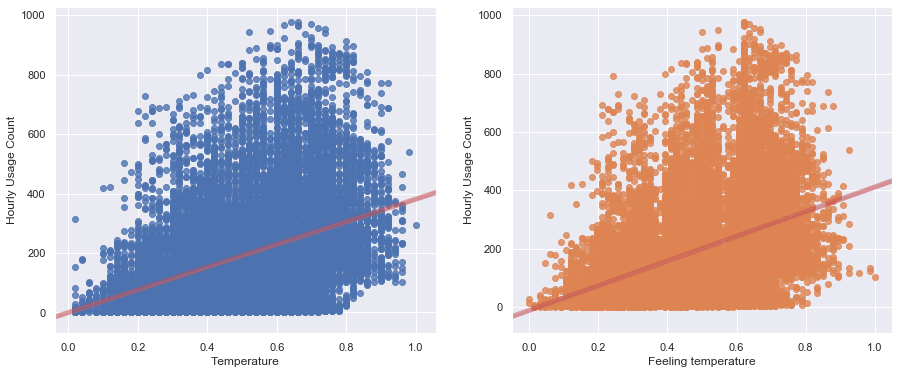

In [113]:
# Dependency of count on temperature
fig, axes = plt.subplots(nrows=1,ncols=2, squeeze=False)
fig.set_size_inches(15, 6)
sns.regplot(data=df, x="temp", y="cnt", line_kws={"color":"r","alpha":0.5,"lw":5}, ax=axes[0][0])
sns.regplot(data=df, x="atemp", y="cnt", line_kws={"color":"r","alpha":0.5,"lw":5}, ax=axes[0][1])

axes[0][0].set(xlabel='Temperature', ylabel='Hourly Usage Count')
axes[0][1].set(xlabel='Feeling temperature', ylabel='Hourly Usage Count')

**Interpretation:** As seen from the scatter plots above, there is positive correlation between both temperature-to-usage and feeling-temperature-to-usage, which makes sense as people are not likely to bike outside on cold weather. 

### Understanding humidity effect on count

[Text(0, 0.5, 'Hourly Usage Count'),
 Text(0.5, 0, 'Humidity'),
 Text(0.5, 1.0, 'Humidity vs Usage')]

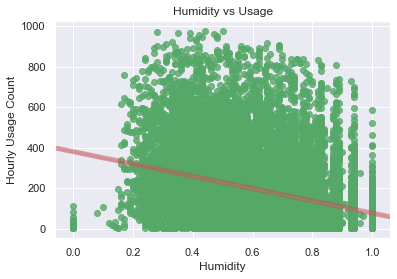

In [115]:
# Dependency of count on humidity
ax=sns.regplot(data=df, x="hum", y="cnt", color="g", line_kws={"color":"r","alpha":0.5,"lw":5})
ax.set(xlabel='Humidity', ylabel='Hourly Usage Count', title="Humidity vs Usage")

**Interpretation:** There seems to be a negative correlation between humidity and the usage count, with a linear fit very close to the best fit. High humidity is directly related to high rainfall, so it could be hypothesized that weather situation will affect the usage, with high rainfall lowering the usage.

## Understanding the impact of weather situation on count

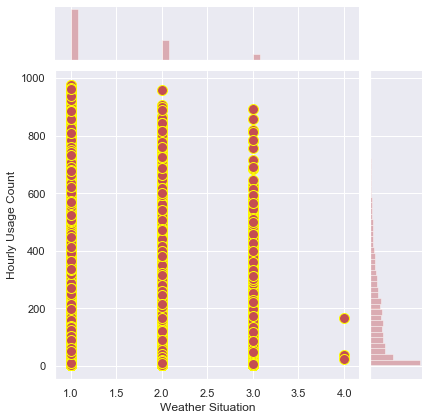

In [136]:
ax=sns.jointplot(data=df, x="weathersit", y="cnt", kind='scatter', s=100, color='r', edgecolor="yellow", linewidth=1)
ax.set_axis_labels('Weather Situation', 'Hourly Usage Count', fontsize=12)

### Box Plots for hourly and yearly usage

[Text(0, 0.5, 'Hourly Usage Count'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Box Plot on yearly usage')]

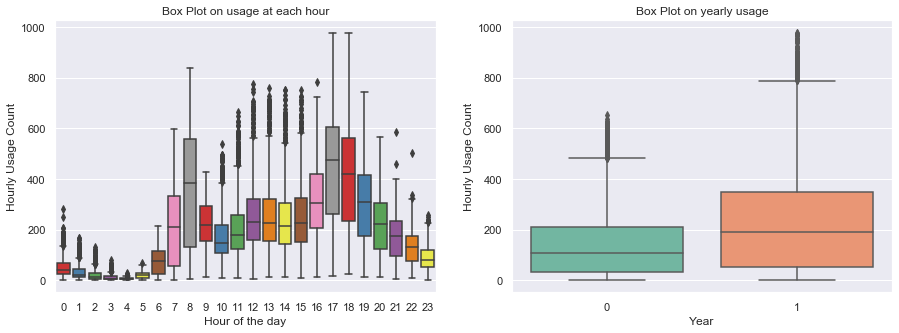

In [143]:
fig, axes = plt.subplots(nrows=1, ncols=2, squeeze=False)
fig.set_size_inches(15, 5)

sns.boxplot(data=df, x='hr', y='cnt', palette="Set1", ax=axes[0][0])
sns.boxplot(data=df, x='yr', y='cnt', palette='Set2', ax=axes[0][1])

axes[0][0].set(xlabel='Hour of the day', ylabel='Hourly Usage Count', title="Box Plot on usage at each hour")
axes[0][1].set(xlabel='Year', ylabel='Hourly Usage Count',title="Box Plot on yearly usage")

**Interpretation:** Looking at the box plots (left) for each hour of the day, it is evident that the highest usage is during 7-9 am and 5-7 pm, which indicates that most of the users rent e-bikes to get to school or work. The box plot on the right reveals that the usage rate goes up from year 1 to year 2, which means the system grew in popularity over time.

### Season and month situation with respect to working day

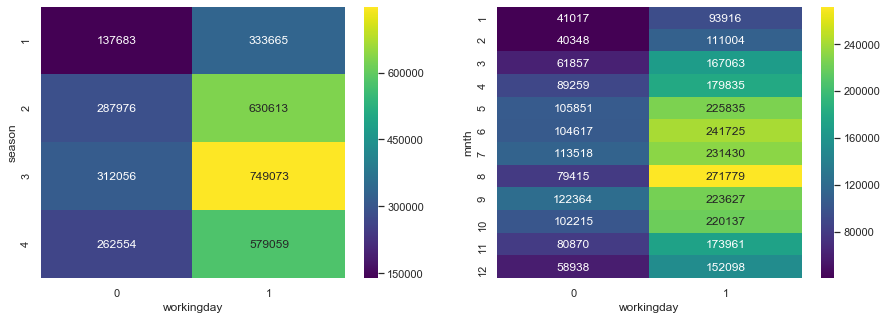

In [138]:
fig, axes = plt.subplots(nrows=1,ncols=2, squeeze=False)
fig.set_size_inches(15, 5)

# Impact of season and working day on count
season_results = pd.pivot_table(df, values='cnt', index=['season'], columns=['workingday'], aggfunc=np.sum)

# Impact of month and working day on count
month_results = pd.pivot_table(df, values='cnt', index=['mnth'], columns=['workingday'], aggfunc=np.sum)


sns.heatmap(season_results, annot=True, fmt="g", cmap='viridis', ax=axes[0][0])
sns.heatmap(month_results, annot=True, fmt="g", cmap='viridis', ax=axes[0][1])

**Interpretation:** The above heatmap (left) demonstrates an interesting correlation with maximum usage during the summer season (3); and similar results can also be seen from the heatmap (right) with an evidently higher usage from May until October. 

### Correlation Matrix

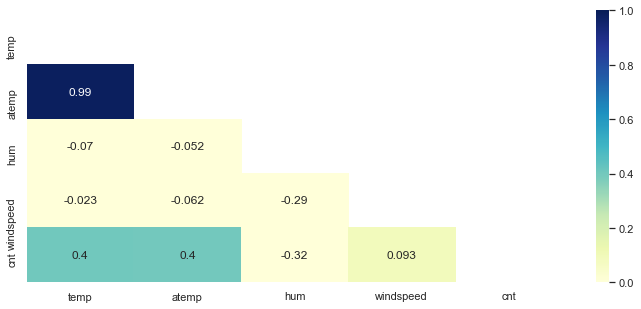

In [236]:
plt.figure(figsize=(12,5))
c= df[continuous_variables + target].corr()
mask = np.zeros_like(c)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(c,cmap="YlGnBu",annot=True, mask=mask, vmax=1.0, vmin=0.0)

**Interpretation:** The above correlation matrix also indicates the similar trends observed so far and shows high degree of association between temp and atemp. Looking at the observations, it can be concluded that hour and temperature are promising features to predict hourly count value.

## Outlier Treatment

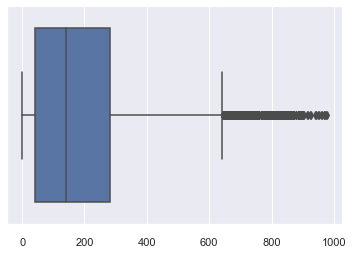

In [106]:
sns.boxplot(x=df[target])

In [5]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

instant       8689.0000
season           1.0000
yr               1.0000
mnth             6.0000
hr              12.0000
holiday          0.0000
weekday          4.0000
workingday       1.0000
weathersit       1.0000
temp             0.3200
atemp            0.2879
hum              0.3000
windspeed        0.1492
casual          44.0000
registered     186.0000
cnt            241.0000
dtype: float64

[Text(0.5, 1.0, 'Without Outliers')]

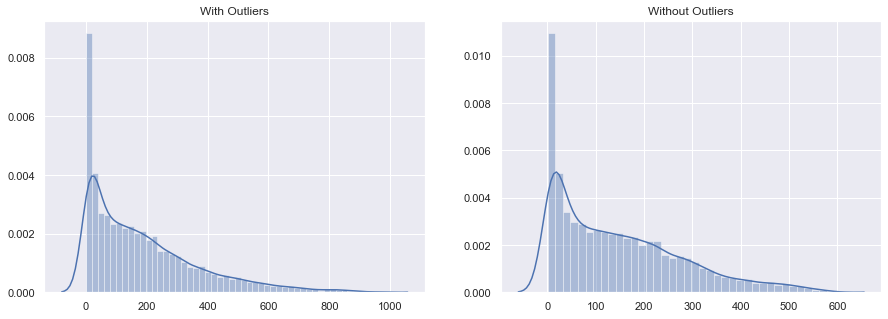

In [6]:
# Removing the outliers from the data set

fig, axes = plt.subplots(nrows=1,ncols=2, squeeze=False)
fig.set_size_inches(15, 5)
sns.distplot(df[target], ax=axes[0][0])
df_processed = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

sns.distplot(df_processed[target], ax=axes[0][1])
axes[0][0].set(title="With Outliers")
axes[0][1].set(title="Without Outliers")

In [7]:
# Removing the correlated attribute from the feature list
features.remove('atemp')

# Model Selection

Provide data set splits for training, validation, and testing:

In [130]:
X=np.array(df_processed[features])
y=np.array(df_processed[target]).ravel()

X_ktrain, X_test, y_ktrain, y_test = train_test_split(X, y,test_size = 0.2 , random_state = 1)
X_train, X_val, y_train, y_val = train_test_split(X_ktrain, y_ktrain,test_size = 0.2 , random_state = 1)

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((9471, 10), (9471,), (2368, 10), (2368,), (2960, 10), (2960,))

As the problem set has a continuous target variable, the predictive analytics requires a regression ML algorithm. Another important characteristic for model selection is the size (in terms of total samples) of the data which in this case is less than 20k. Moreover, EDA showed that not all the features are significant for predicting the hourly usage count. Combining all these factors and task definition, I employed various regression model such as Linear Regression, Ridge, Lasso, Elastic Net, KNN, Decision Tree, and Random Forest and evaluated their performance.

In [118]:
# Creating a list of all the models to be evaluated
models = []
models.append(('Linear Regression', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('Elastic Net', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('Decision Tree', DecisionTreeRegressor()))
models.append(('Random Forest', RandomForestRegressor(n_estimators=100)))
t = PrettyTable(['Model', 'R-square', 'Mean Absolute Error'])

In [131]:
# Evaluate each model in turn using cross-validation
t.clear_rows()
results = []
names = []
# Evaluation criteria for regression
scoring = ['r2','neg_mean_absolute_error']

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=21)
    cv_results = cross_validate(model, X_ktrain, y_ktrain, cv=kfold, scoring=scoring,
                               return_train_score=True)
        
    results.append(cv_results)
    names.append(name)
    t.add_row([name, format(np.mean(cv_results['test_r2']), '.2f'), format(np.negative(np.mean(cv_results['test_neg_mean_absolute_error'])), '.2f')])

print (t)


+-------------------+----------+---------------------+
|       Model       | R-square | Mean Absolute Error |
+-------------------+----------+---------------------+
| Linear Regression |   0.36   |        80.35        |
|       Ridge       |   0.36   |        80.35        |
|       Lasso       |   0.36   |        80.68        |
|    Elastic Net    |   0.26   |        88.09        |
|        KNN        |   0.79   |        40.62        |
|   Decision Tree   |   0.71   |        45.18        |
|   Random Forest   |   0.85   |        34.02        |
+-------------------+----------+---------------------+


# Modeling & Evaluation

## Random Forest Model

In [132]:
table = PrettyTable()
table.field_names = ["Model", "R² score", "Mean absolute error","Model type"]

# Model training
model = RandomForestRegressor(n_estimators=400, random_state=42)
model.fit(X_train, y_train)

def evaluate(model, x, y, category):
    
    pred = model.predict(x)

    score = format(model.score(x, y), '.2f')
    mae = format(mean_absolute_error(y, pred), '.2f')
    
    table.add_row(["RandomForestRegressor", score, mae, category])

evaluate(model, X_train, y_train, 'training')
evaluate(model, X_val, y_val, 'validation')
print (table)

+-----------------------+----------+---------------------+------------+
|         Model         | R² score | Mean absolute error | Model type |
+-----------------------+----------+---------------------+------------+
| RandomForestRegressor |   0.98   |        12.65        |  training  |
| RandomForestRegressor |   0.86   |        34.06        | validation |
+-----------------------+----------+---------------------+------------+


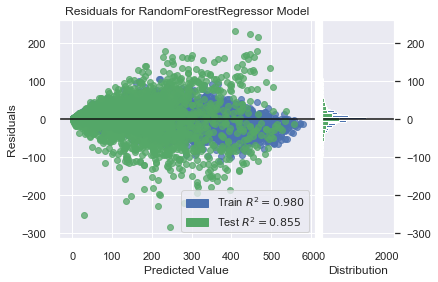

In [133]:
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
visualizer.show()

## Hyperparameter Tuning the Random Forest

In [134]:
# Parameters currently used by Random Forest
print('Parameters currently in use:\n')
pprint(model.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 400,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [33]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [135]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 23.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 44.1min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [136]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [137]:
table = PrettyTable()
table.field_names = ["Model", "R² score", "Mean absolute error", "Model type"]
table.clear_rows()
# Comparison of the base model and randomized model
base_model = RandomForestRegressor(random_state=42, n_estimators=400)
evaluate(model, X_val, y_val, "Base")

best_random = rf_random.best_estimator_
evaluate(best_random, X_val, y_val, "RandomizedCV")

print (table)

+-----------------------+----------+---------------------+--------------+
|         Model         | R² score | Mean absolute error |  Model type  |
+-----------------------+----------+---------------------+--------------+
| RandomForestRegressor |   0.86   |        34.06        |     Base     |
| RandomForestRegressor |   0.86   |        33.93        | RandomizedCV |
+-----------------------+----------+---------------------+--------------+


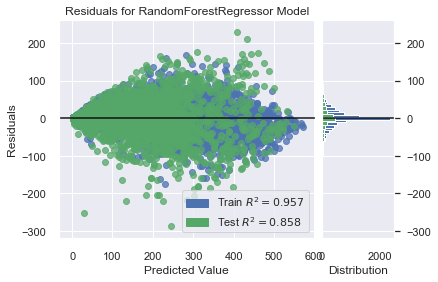

In [138]:
visualizer = ResidualsPlot(best_random)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
visualizer.show()

## Feature Importance

In [139]:
importances = best_random.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_random.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

In [140]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X_val.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature hr (0.616394)
2. feature temp (0.132102)
3. feature workingday (0.074724)
4. feature hum (0.057697)
5. feature season (0.026240)
6. feature windspeed (0.025898)
7. feature mnth (0.022810)
8. feature weekday (0.022567)
9. feature weathersit (0.021569)
10. feature holiday (0.000000)


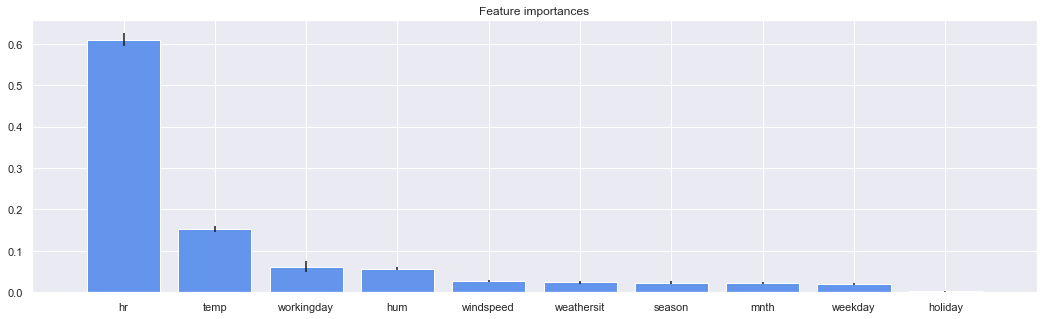

In [44]:
# Plot the feature importances of the forest
plt.figure(figsize=(18,5))
plt.title("Feature importances")
plt.bar(range(X_val.shape[1]), importances[indices], color="cornflowerblue", yerr=std[indices], align="center")
plt.xticks(range(X_val.shape[1]), [features[i] for i in indices])
plt.xlim([-1, X_val.shape[1]])
plt.show()

In [142]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.1
sfm = SelectFromModel(best_random, threshold=0.01)

# Train the selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                                max_depth=None,
                                                max_features='auto',
                                                max_leaf_nodes=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=2,
                                                min_samples_split=5,
                                                min_weight_fraction_leaf=0.0,
                                                n_estimators=800, n_jobs=None,
                                                oob_score=False,
                                                random_state=None, verbose=0,
                                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, th

In [143]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(features[feature_list_index])

temp
hum
windspeed
season
mnth
hr
weekday
workingday
weathersit


In [144]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_val = sfm.transform(X_val)
X_important_test = sfm.transform(X_test)

In [145]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestRegressor(n_estimators=400, random_state=42, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=-1,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [146]:
# Evaluate the performance of the randomized model by removing unimportant feature
table.clear_rows()
evaluate (clf_important, X_important_val, y_val, "Important_val")
print (table)

+-----------------------+----------+---------------------+---------------+
|         Model         | R² score | Mean absolute error |   Model type  |
+-----------------------+----------+---------------------+---------------+
| RandomForestRegressor |   0.86   |        34.05        | Important_val |
+-----------------------+----------+---------------------+---------------+
